In [4]:
import math
import matplotlib.pylab as plt 
import matplotlib.axes
import numpy as np 
from matplotlib.animation import FuncAnimation

In [5]:
h = 22
l = 3
l_0 = 1.9
c = 2.3
side = 0

timestep 22
timestep 22
timestep 21
timestep 20
timestep 19
timestep 18
timestep 17
timestep 16
timestep 15
timestep 14
timestep 13
timestep 12
timestep 11
timestep 10
timestep 9
timestep 8
timestep 7
timestep 6
timestep 5
timestep 4
timestep 3
timestep 2
timestep 1
timestep 22


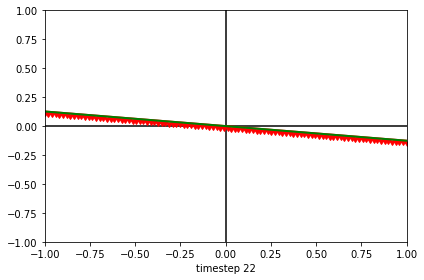

In [7]:
fig, ax = plt.subplots()
fig.set_tight_layout(True)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.axvline(x = 0, ymin=-1, ymax=1, color ="black")
plt.axhline(y = 0, xmin=-1, xmax=1, color ="black")
    
    
x = np.linspace(-1,1,100)
y = [0]*x.shape[0]
epsilon = 0.1

if side == 1:
    line_eagle, = ax.plot(x, y, 'r-', linewidth=2, marker=11)
    line_tail, = ax.plot(x, [epsilon]*x.shape[0], 'g-', linewidth=2)
else: 
    line_eagle, = ax.plot(x, y, 'r-', linewidth=2, marker=11)
    line_tail, = ax.plot(x, [epsilon]*x.shape[0], 'g-', linewidth=2)
    
sum_angle = 0

def update(h_delta):
    global sum_angle
    label = 'timestep {0}'.format(h_delta)
    print(label)

    fi = c*math.sqrt(l_0*h_delta)/(l-l_0)
    sin_fi = math.sin(fi)
    sum_angle += sin_fi
    line_eagle.set_ydata(x*math.tan(sum_angle))
    line_tail.set_ydata(x*math.tan(sum_angle))

    ax.set_xlabel(label)
    return line_eagle, line_tail, ax
        
    
anim = FuncAnimation(fig, update, frames=range(h, 0, -1), interval=200)
anim.save('line.gif', dpi=80, writer='imagemagick')

In [4]:
def get_coin_side(h, l, l_0, c, side):
    fi = c*math.sqrt(l_0*h)/(l-l_0)
    sin_fi = math.sin(fi)
    resutl = 0.5*(1 + math.copysign(1, sin_fi*side))
    return int(resutl)

In [ ]:
result = get_coin_side(sin_fi, side)
result 